In [977]:
from pathlib import Path
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from dmba import classificationSummary, gainsChart, liftChart, regressionSummary, exhaustive_search, forward_selection, backward_elimination, adjusted_r2_score, AIC_score, BIC_score

from sklearn.neural_network import MLPRegressor 
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score


In [978]:
bank_df = pd.read_csv("/Users/anilkumar/Downloads/Bankloan.csv")
bank_df

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [979]:
num_rows, num_columns = bank_df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 5000
Number of columns: 14


In [980]:
print(bank_df.columns)


Index(['ID', 'Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal.Loan', 'Securities.Account',
       'CD.Account', 'Online', 'CreditCard'],
      dtype='object')


In [981]:
import pandas as pd

# Assuming bank_df is your DataFrame
# Replace the column names accordingly

# Check for negative values in each column
negative_values = bank_df.lt(0)

# Check if any negative values exist in the dataset
if negative_values.any().any():
    print("Negative values exist in the dataset.")
    print("Columns with negative values:")
    print(negative_values.sum())
else:
    print("No negative values found in the dataset.")


Negative values exist in the dataset.
Columns with negative values:
ID                     0
Age                    0
Experience            52
Income                 0
ZIP.Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal.Loan          0
Securities.Account     0
CD.Account             0
Online                 0
CreditCard             0
dtype: int64


In [982]:
import pandas as pd

# Load the DataFrame
bank_df = pd.read_csv("/Users/anilkumar/Downloads/Bankloan.csv")

# Check for negative values in the 'Experience' column
experience_negatives = bank_df['Experience'].lt(0)

# Filter out rows with negative 'Experience' values
bank_df_cleaned = bank_df[~experience_negatives]

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(bank_df_cleaned)

# Updated number of rows
print("Number of rows after removing rows with negative 'Experience' values:", len(bank_df_cleaned))


Cleaned DataFrame:
        ID  Age  Experience  Income  ZIP.Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal.Loan  Securities.Account  CD.Account  Online  \
0      

In [983]:
import pandas as pd

# Load the DataFrame
bank_df = pd.read_csv("/Users/anilkumar/Downloads/Bankloan.csv")

# Check for negative values in the 'Experience' column
experience_negatives = bank_df['Experience'].lt(0)

# Filter out rows with negative 'Experience' values
bank_df_cleaned = bank_df[~experience_negatives]

# Check for negative values in the cleaned DataFrame
negative_values_cleaned = bank_df_cleaned.lt(0)

# Check if any negative values exist in the cleaned DataFrame
if negative_values_cleaned.any().any():
    print("Negative values exist in the cleaned DataFrame.")
    print("Columns with negative values:")
    print(negative_values_cleaned.sum())
else:
    print("No negative values found in the cleaned DataFrame.")

# Updated number of rows
print("Number of rows after removing rows with negative 'Experience' values:", len(bank_df_cleaned))


No negative values found in the cleaned DataFrame.
Number of rows after removing rows with negative 'Experience' values: 4948


In [984]:
import pandas as pd


# Drop the columns 'ID' and 'ZIP.Code'
bank_df_cleaned.drop(['ID', 'ZIP.Code'], axis=1, inplace=True)

# Now the DataFrame 'bank_df' should not contain 'ID' and 'ZIP.Code'

# Any subsequent code should use 'bank_df' without 'ID' and 'ZIP.Code'
# For example:
print(bank_df_cleaned.columns)  # This should not include 'ID' and 'ZIP.Code'


Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal.Loan', 'Securities.Account', 'CD.Account',
       'Online', 'CreditCard'],
      dtype='object')


/var/folders/56/tqww4kw13tz968cxljj3pzhw0000gn/T/ipykernel_2613/544882854.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_df_cleaned.drop(['ID', 'ZIP.Code'], axis=1, inplace=True)


In [985]:

# Check for missing values
missing_values = bank_df_cleaned.isnull().sum()

print("Missing Values:")
print(missing_values)



Missing Values:
Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64


In [986]:
# Check for null values
null_values = bank_df_cleaned.isna().sum()
print("\nNull Values:")
print(null_values)


Null Values:
Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64


In [987]:
bank_df_cleaned.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal.Loan           int64
Securities.Account      int64
CD.Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [988]:
bank_df_cleaned.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,45.557195,20.331043,73.814470,2.391471,1.935926,1.878941,56.634398,0.097009,0.104285,0.061035,0.597009,0.294058
std,11.320735,11.311973,46.112596,1.148444,1.747694,0.839745,101.828885,0.296000,0.305660,0.239418,0.490549,0.455664
min,24.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,10.750000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [989]:
print(bank_df_cleaned.columns)

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal.Loan', 'Securities.Account', 'CD.Account',
       'Online', 'CreditCard'],
      dtype='object')


In [990]:
num_credit_card_holders = bank_df_cleaned['CreditCard'].value_counts()[1]
print("Number of individuals with credit cards:", num_credit_card_holders)

num_no_credit_card_holders = bank_df_cleaned[bank_df_cleaned['CreditCard'] == 0].shape[0]
print("Number of individuals without credit cards:", num_no_credit_card_holders)


Number of individuals with credit cards: 1455
Number of individuals without credit cards: 3493


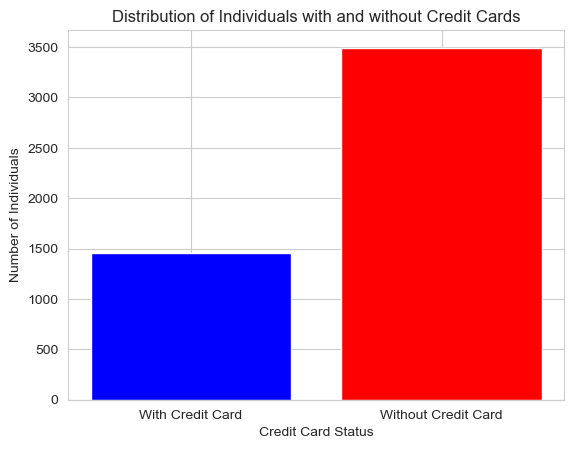

In [991]:
import matplotlib.pyplot as plt

# Data
credit_card_labels = ['With Credit Card', 'Without Credit Card']
num_credit_card_holders = bank_df_cleaned['CreditCard'].value_counts()[1]
num_no_credit_card_holders = bank_df_cleaned['CreditCard'].value_counts()[0]
counts = [num_credit_card_holders, num_no_credit_card_holders]

# Plot
plt.bar(credit_card_labels, counts, color=['blue', 'red'])
plt.title('Distribution of Individuals with and without Credit Cards')
plt.xlabel('Credit Card Status')
plt.ylabel('Number of Individuals')
plt.show()


In [992]:
import pandas as pd


# Get the exact number of occurrences for each family size
family_counts = bank_df_cleaned['Family'].value_counts().sort_index()

print("Number of members in the family:")
for family_size, count in family_counts.items():
    print(f"Family size {family_size}: {count}")


Number of members in the family:
Family size 1: 1470
Family size 2: 1274
Family size 3: 1001
Family size 4: 1203


In [993]:
#X='Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities.Account','CD.Account','Online','CreditCard'
#y='Personal.Loan'

In [994]:
# predictors X and output variable Y for the data set.
X = bank_df_cleaned.drop(columns=['Personal.Loan'])
y = bank_df_cleaned['Personal.Loan']

# Develop training (70%) and validation(30% or 0.3) partitions for
# UniversalBank data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)



bank Delays Classification Tree after Splits


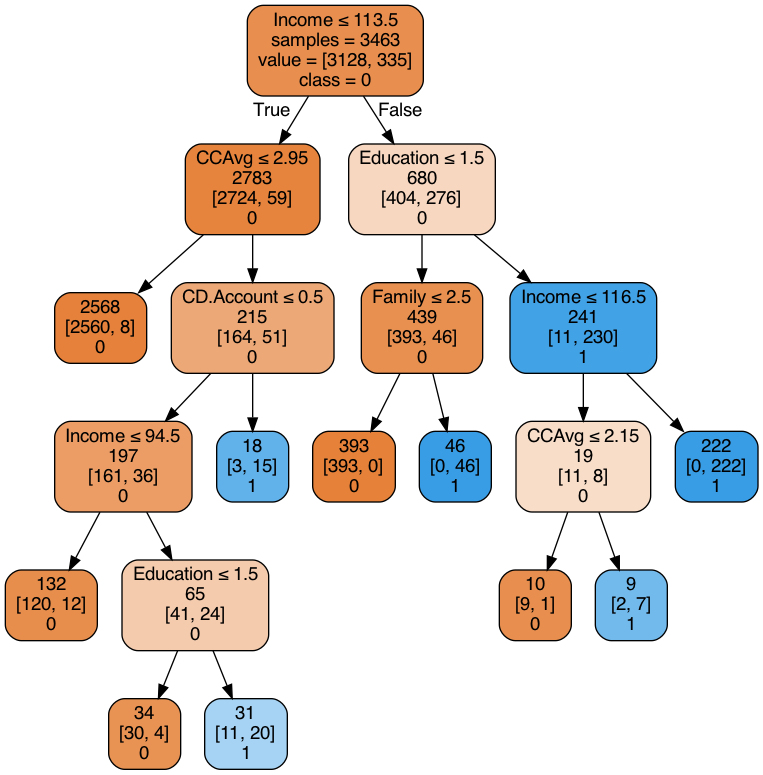

In [995]:
# Develop a classification tree using training partition.
bank_tree = DecisionTreeClassifier(max_depth=5, 
                min_impurity_decrease=0.001, min_samples_split=10)
bank_tree.fit(train_X, train_y)

# Display classes used in the classification tree: 'delayed' and 'ontime'.
#print("Classes: {}".format(', '.join(bank_tree.classes_)))

# Use plotDecisionTree() function to visualize the classfication tree.
# The order of the 'value' in the boxes is the same as 'flight_tree.classes_',
# i.e., the first number is 'delays' and the second number 'ontime'.
print()
print('bank Delays Classification Tree after Splits')
plotDecisionTree(bank_tree, feature_names=train_X.columns, class_names=bank_tree.classes_)

In [996]:
# Number of nodes in the decision tree
num_nodes = bank_tree.tree_.node_count
print("Number of nodes in the decision tree:", num_nodes)

# Number of splits in the decision tree
num_splits = num_nodes - 1
print("Number of splits in the decision tree:", num_splits)

# Maximum depth of the classification tree
max_depth_bank_tree = bank_tree.tree_.max_depth
print("Maximum depth of the classification tree:", max_depth_bank_tree)


Number of nodes in the decision tree: 19
Number of splits in the decision tree: 18
Maximum depth of the classification tree: 5


In [997]:
# Confusion matrices for full classification tree. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition for Smaller Tree')
classificationSummary(train_y, bank_tree.predict(train_X))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition for Smaller Tree')
classificationSummary(valid_y, bank_tree.predict(valid_X))

Training Partition for Smaller Tree
Confusion Matrix (Accuracy 0.9882)

       Prediction
Actual    0    1
     0 3112   16
     1   25  310

Validation Partition for Smaller Tree
Confusion Matrix (Accuracy 0.9838)

       Prediction
Actual    0    1
     0 1331    9
     1   15  130


In [998]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(2, 25)),  
    'min_impurity_decrease': [0, 0.0005, 0.001], 
    'min_samples_split': list(range(5, 20)),
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() improved parameters. 
gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.9853
Improved parameters:  {'max_depth': 7, 'min_impurity_decrease': 0, 'min_samples_split': 13}


Best Classification Tree with Grid Search


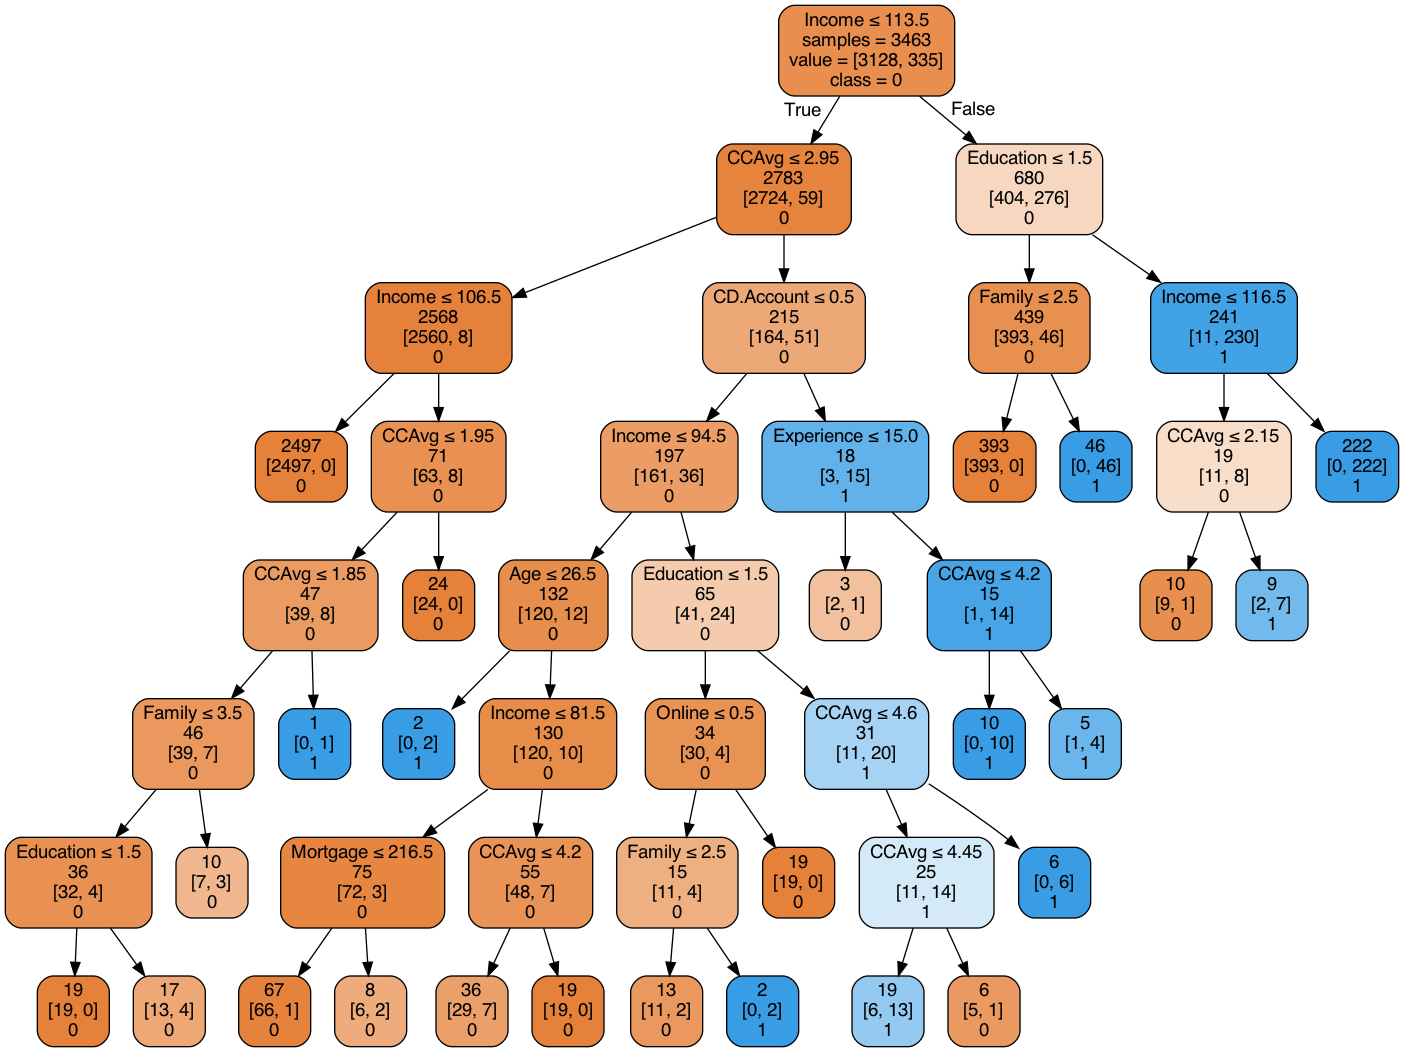

In [999]:
# Create classification tree based on the improved parameters.
bestClassTree = gridSearch.best_estimator_

# Display classification tree based on improved parameters
print('Best Classification Tree with Grid Search')
plotDecisionTree(bestClassTree, feature_names=train_X.columns, class_names=bank_tree.classes_)

In [1000]:
# Number of nodes in the best classification tree
num_nodes_best = bestClassTree.tree_.node_count
print("Number of nodes in the best classification tree:", num_nodes_best)

# Number of splits in the best classification tree
num_splits_best = num_nodes_best - 1
print("Number of splits in the best classification tree:", num_splits_best)

# Maximum depth of the best classification tree
max_depth_best = bestClassTree.max_depth
print("Maximum depth of the best classification tree:", max_depth_best)



Number of nodes in the best classification tree: 49
Number of splits in the best classification tree: 48
Maximum depth of the best classification tree: 7


In [1001]:
# Confusion matrices for grid search classification tree. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Best Classification Tree with Grid Search')
classificationSummary(train_y, bestClassTree.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Best Classification Tree with Grid Search')
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Training Partition for Best Classification Tree with Grid Search
Confusion Matrix (Accuracy 0.9910)

       Prediction
Actual    0    1
     0 3119    9
     1   22  313

Validation Partition for Best Classification Tree with Grid Search
Confusion Matrix (Accuracy 0.9832)

       Prediction
Actual    0    1
     0 1332    8
     1   17  128


In [1002]:
#comparing both classification tree models
print('Validation Partition for Smaller Tree')
classificationSummary(valid_y, bank_tree.predict(valid_X))
print('Validation Partition for Best Classification Tree with Grid Search')
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Validation Partition for Smaller Tree
Confusion Matrix (Accuracy 0.9838)

       Prediction
Actual    0    1
     0 1331    9
     1   15  130
Validation Partition for Best Classification Tree with Grid Search
Confusion Matrix (Accuracy 0.9832)

       Prediction
Actual    0    1
     0 1332    8
     1   17  128


In [1024]:
# Create predictors X and outcome y variables.
X = bank_df_cleaned.drop(columns=['Personal.Loan'])
y = bank_df_cleaned['Personal.Loan']

# Partition data into training (70% or 0.7) and validation(30% or 0.3)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.3, random_state=1)

# Using LogisticRegression() function, fit multiple predictors logistic 
# regression for training partition. Set penalty='l2' for regularization. 
# Regularization is any modification to a learning algorithm that is 
# intended to reduce its generalization error but not its training error.
# Regularization can be used to train models that generalize 
# better on unseen data by preventing the algorithm from overfitting 
# the training data set.
# Parameter C=1e42 and penalty=l2 lead to ordinal logistic regression. 
# solver='liblinear' is used for automated selection of the best parameters
# of the logistis regression; recommended for large-scale classification.
log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(train_X, train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model:')
print('Intercept: ', np.round(log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors:')
for column, coef in zip(X.columns, log_reg.coef_[0]):
    print('\t- {}: {}'.format(column, np.round(coef, decimals=3)))


Parameters of Logistic Regresion Model:
Intercept:  -11.512
Coefficients for Predictors:
	- Age: -0.067
	- Experience: 0.076
	- Income: 0.054
	- Family: 0.674
	- CCAvg: 0.121
	- Education: 1.668
	- Mortgage: 0.001
	- Securities.Account: -0.831
	- CD.Account: 3.921
	- Online: -0.703
	- CreditCard: -1.287


In [1068]:
# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition')
print(log_result.head(100))

Classification for Validation Partition
      Actual  Classification    p(0)    p(1)
2376       0               0  0.9996  0.0004
3641       0               0  0.7019  0.2981
3774       0               0  0.9502  0.0498
4143       0               0  0.9999  0.0001
250        0               0  0.9973  0.0027
...      ...             ...     ...     ...
1768       1               0  0.7445  0.2555
1866       0               0  0.9844  0.0156
4684       0               0  0.9955  0.0045
201        0               0  0.9995  0.0005
926        0               0  0.9983  0.0017

[100 rows x 4 columns]


In [1005]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Logistic Regression Model')
classificationSummary(train_y, log_reg.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Logistic Regression Model ')
classificationSummary(valid_y, log_reg.predict(valid_X))

Training Partition for Logistic Regression Model
Confusion Matrix (Accuracy 0.9518)

       Prediction
Actual    0    1
     0 3082   46
     1  121  214

Validation Partition for Logistic Regression Model 
Confusion Matrix (Accuracy 0.9542)

       Prediction
Actual    0    1
     0 1323   17
     1   51   94


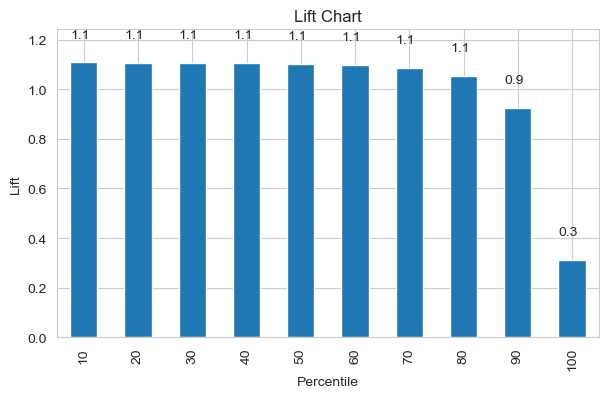

In [1070]:
# Develop and display Lift chart. 

# Create a new df data frame from logit_result data frame
# that is sorted by p(0) in descending order.  
df = log_result.sort_values(by=['p(0)'], ascending=False)

# Create a data plot with a single plot (ncols=1) 
# back-to-back (nrows=1).
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 4))

# Using liftChart() function, create decile-wise Lift chart. 
# In this Lift chart, taking the 10% of the records 
# that are ranked by the model as 'most probable 0's' 
# yields 4.1 times as many 0's ('delayed' flights)as would simply 
# selecting 10% of the records at random.
liftChart(df['p(0)'], title='Lift Chart')
 
# Display the charts. 
# plt.tight_layout()
plt.show()

In [1123]:
# Define train_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def train_model(variables):
    model = LogisticRegression(max_iter=1200)
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use backward_elimination() function to identify the
# best_model and best_variables. 
best_model_be, best_variables_be = backward_elimination(train_X.columns, 
                        train_model, score_model, verbose=True)

# Display best variables based on Backward Elimination algorithm. 
print()
print('Best Variables from Backward Elimination Algorithm')
print(best_variables_be)

Variables: Age, Experience, Income, Family, CCAvg, Education, Mortgage, Securities.Account, CD.Account, Online, CreditCard
Start: score=-523.69
Step: score=-583.92, remove Online
Step: score=-583.92, remove None

Best Variables from Backward Elimination Algorithm
['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities.Account', 'CD.Account', 'CreditCard']


In [1124]:
# Develop the logistic regression model based
# on the Backward Elimination results.


# Identify predictors and outcome of the logistic regression model.
predictors_be = (['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'CD.Account', 'Online', 'CreditCard'])
outcome = 'Personal.Loan'

X = bank_df_cleaned[predictors_be]
y = bank_df_cleaned[outcome]
# Identify X and y variables for logistic regression and partition data
# using 70% of records for training and 30% for validation 
# (test_size=0.3). 

train_X_be, valid_X_be, train_y_be, valid_y_be = \
          train_test_split(X, y, test_size=0.3, random_state=1)

# Create logistic regression model using X and y.
bank_be = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
bank_be.fit(train_X_be, train_y_be)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(bank_be.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(bank_be.coef_[0], decimals=3)}, 
                    index=X.columns).transpose())


Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: -13.476
Coefficients for Predictors
          Age  Income  Family  CCAvg  Education  Mortgage  CD.Account  Online  \
Coeff:  0.008   0.054   0.671   0.12      1.638     0.001        3.43  -0.649   

        CreditCard  
Coeff:      -1.176  


In [1125]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Logistic Model Based On Backward Elimination')
classificationSummary(train_y_be, bank_be.predict(train_X_be))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Logistic Model Based On Backward Elimination')
classificationSummary(valid_y_be, bank_be.predict(valid_X_be))

Training Partition for Logistic Model Based On Backward Elimination
Confusion Matrix (Accuracy 0.9506)

       Prediction
Actual    0    1
     0 3081   47
     1  124  211

Validation Partition for Logistic Model Based On Backward Elimination
Confusion Matrix (Accuracy 0.9535)

       Prediction
Actual    0    1
     0 1322   18
     1   51   94


In [1126]:
# Identify and display confusion matrix for validation partition. 

print('Validation Partition for Logistic Regression Model ')
classificationSummary(valid_y, log_reg.predict(valid_X))
print('Validation Partition for Logistic Model Based On Backward Elimination')
classificationSummary(valid_y_be, bank_be.predict(valid_X_be))

Validation Partition for Logistic Regression Model 
Confusion Matrix (Accuracy 0.9542)

       Prediction
Actual    0    1
     0 1323   17
     1   51   94
Validation Partition for Logistic Model Based On Backward Elimination
Confusion Matrix (Accuracy 0.9535)

       Prediction
Actual    0    1
     0 1322   18
     1   51   94
